# **Ecommerce & Fraud**

# **Exploratory Data Analysis**

In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
import statsmodels.api as sm
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
import plotly.express as px
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load consumer dataset
c = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer.csv') 
#View
c.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [ ]:
c.columns

Index(['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'No_Transactions',
       'No_Orders', 'No_Payments', 'Fraud'],
      dtype='object')

In [ ]:
c.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


In [ ]:
# load consumer transaction dataset
ct = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cust_transaction.csv') 
#View
ct.head()

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [ ]:
ct.info

<bound method DataFrame.info of      Unnamed: 0            customerEmail transactionId orderId  \
0             0   josephhoward@yahoo.com      a9lcj51r  vjbdvd   
1             1   josephhoward@yahoo.com      y4wcv03i  yp6x27   
2             2   evansjeffery@yahoo.com      5mi94sfw  nlghpa   
3             3   evansjeffery@yahoo.com      br8ba1nu  uw0eeb   
4             4   evansjeffery@yahoo.com      a33145ss  bn44oh   
..          ...                      ...           ...     ...   
618         618  dawn05@tucker-brown.com      7yilsi1o  1bubxa   
619         619  dawn05@tucker-brown.com      c82k5bcv  1bubxa   
620         620  dawn05@tucker-brown.com      wmh52bns  1bubxa   
621         621  dawn05@tucker-brown.com      xdw33hfp  p0gdbf   
622         622  dawn05@tucker-brown.com      wgmajf82  5lmvrj   

    paymentMethodId  paymentMethodRegistrationFailure paymentMethodType  \
0         wt07xm68b                                 1              card   
1         wt07xm68b      

In [ ]:
ct.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


In [ ]:
#view duplicates
ct.duplicated().any()

False

In [ ]:
c.duplicated().any()

False

In [ ]:
#missing values
ct.isna().any()

Unnamed: 0                          False
customerEmail                       False
transactionId                       False
orderId                             False
paymentMethodId                     False
paymentMethodRegistrationFailure    False
paymentMethodType                   False
paymentMethodProvider               False
transactionAmount                   False
transactionFailed                   False
orderState                          False
dtype: bool

In [ ]:
c.isna().any()

Unnamed: 0                False
customerEmail             False
customerPhone             False
customerDevice            False
customerIPAddress         False
customerBillingAddress    False
No_Transactions           False
No_Orders                 False
No_Payments               False
Fraud                     False
dtype: bool

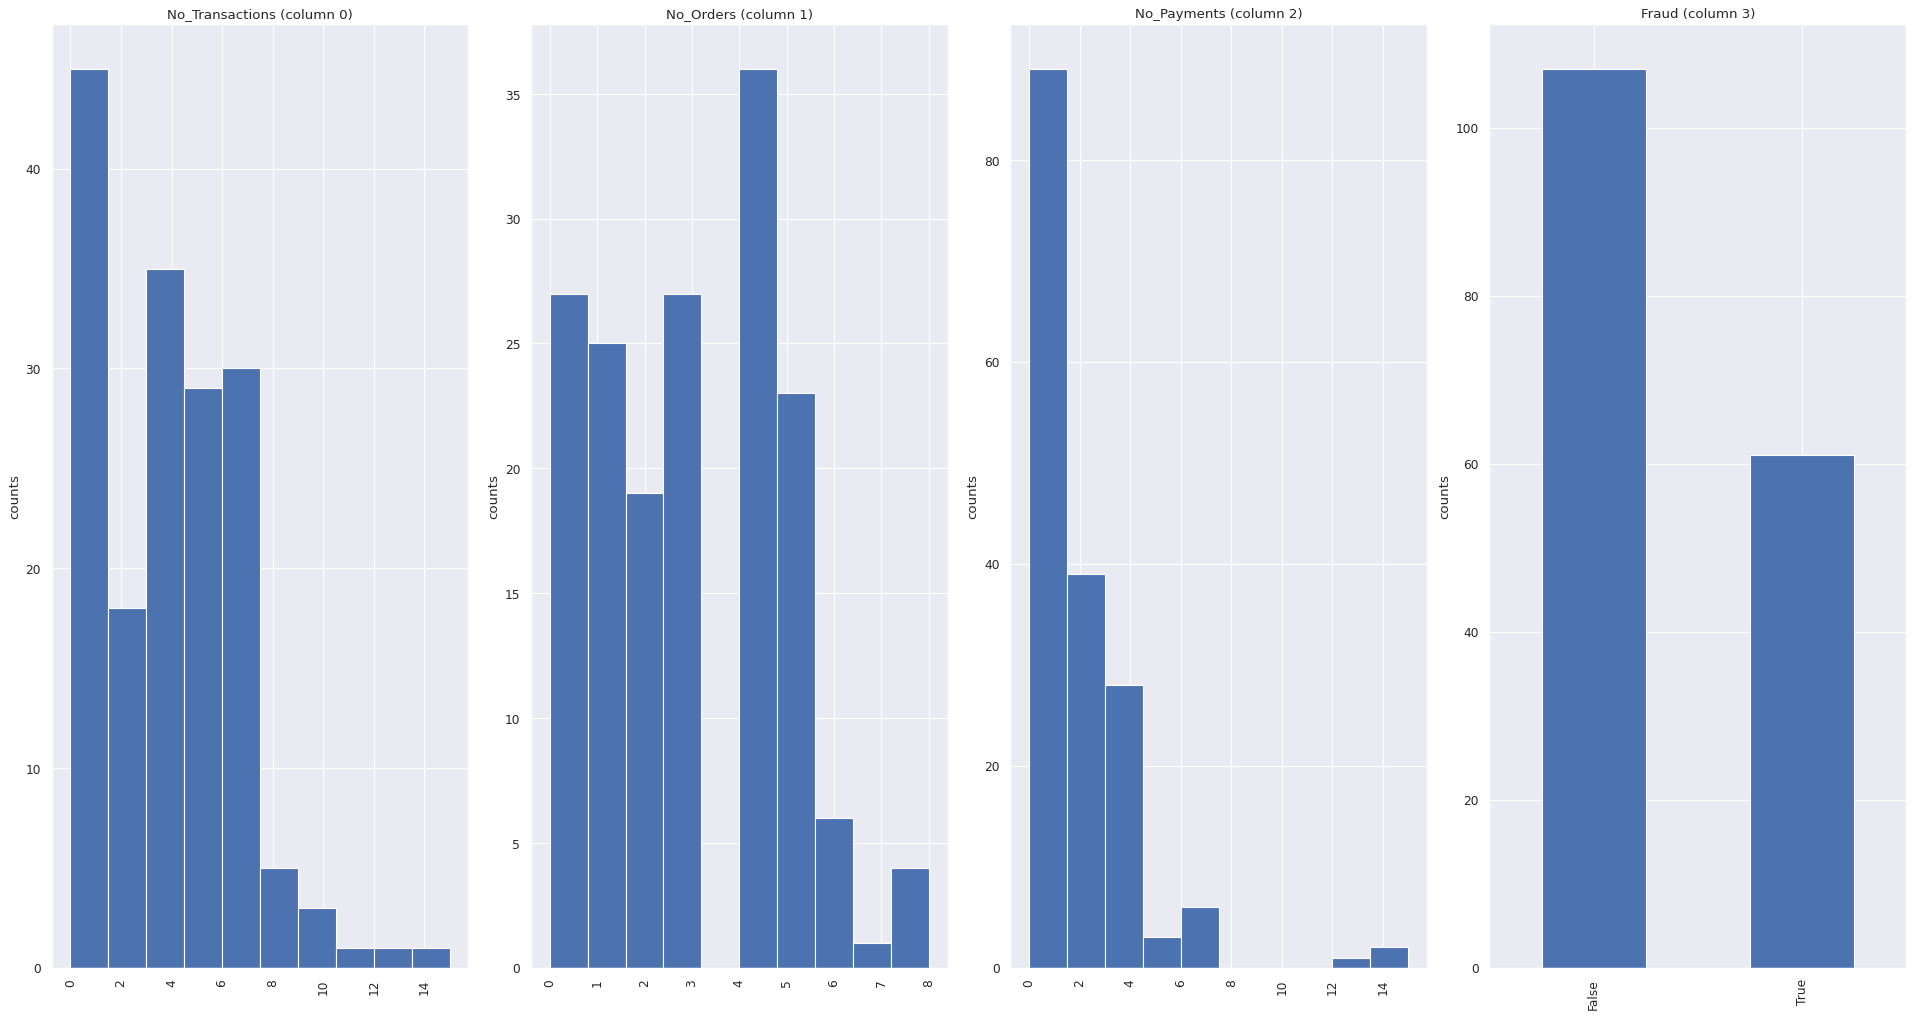

In [ ]:
#distribtuion
plotPerColumnDistribution(c,10,5)

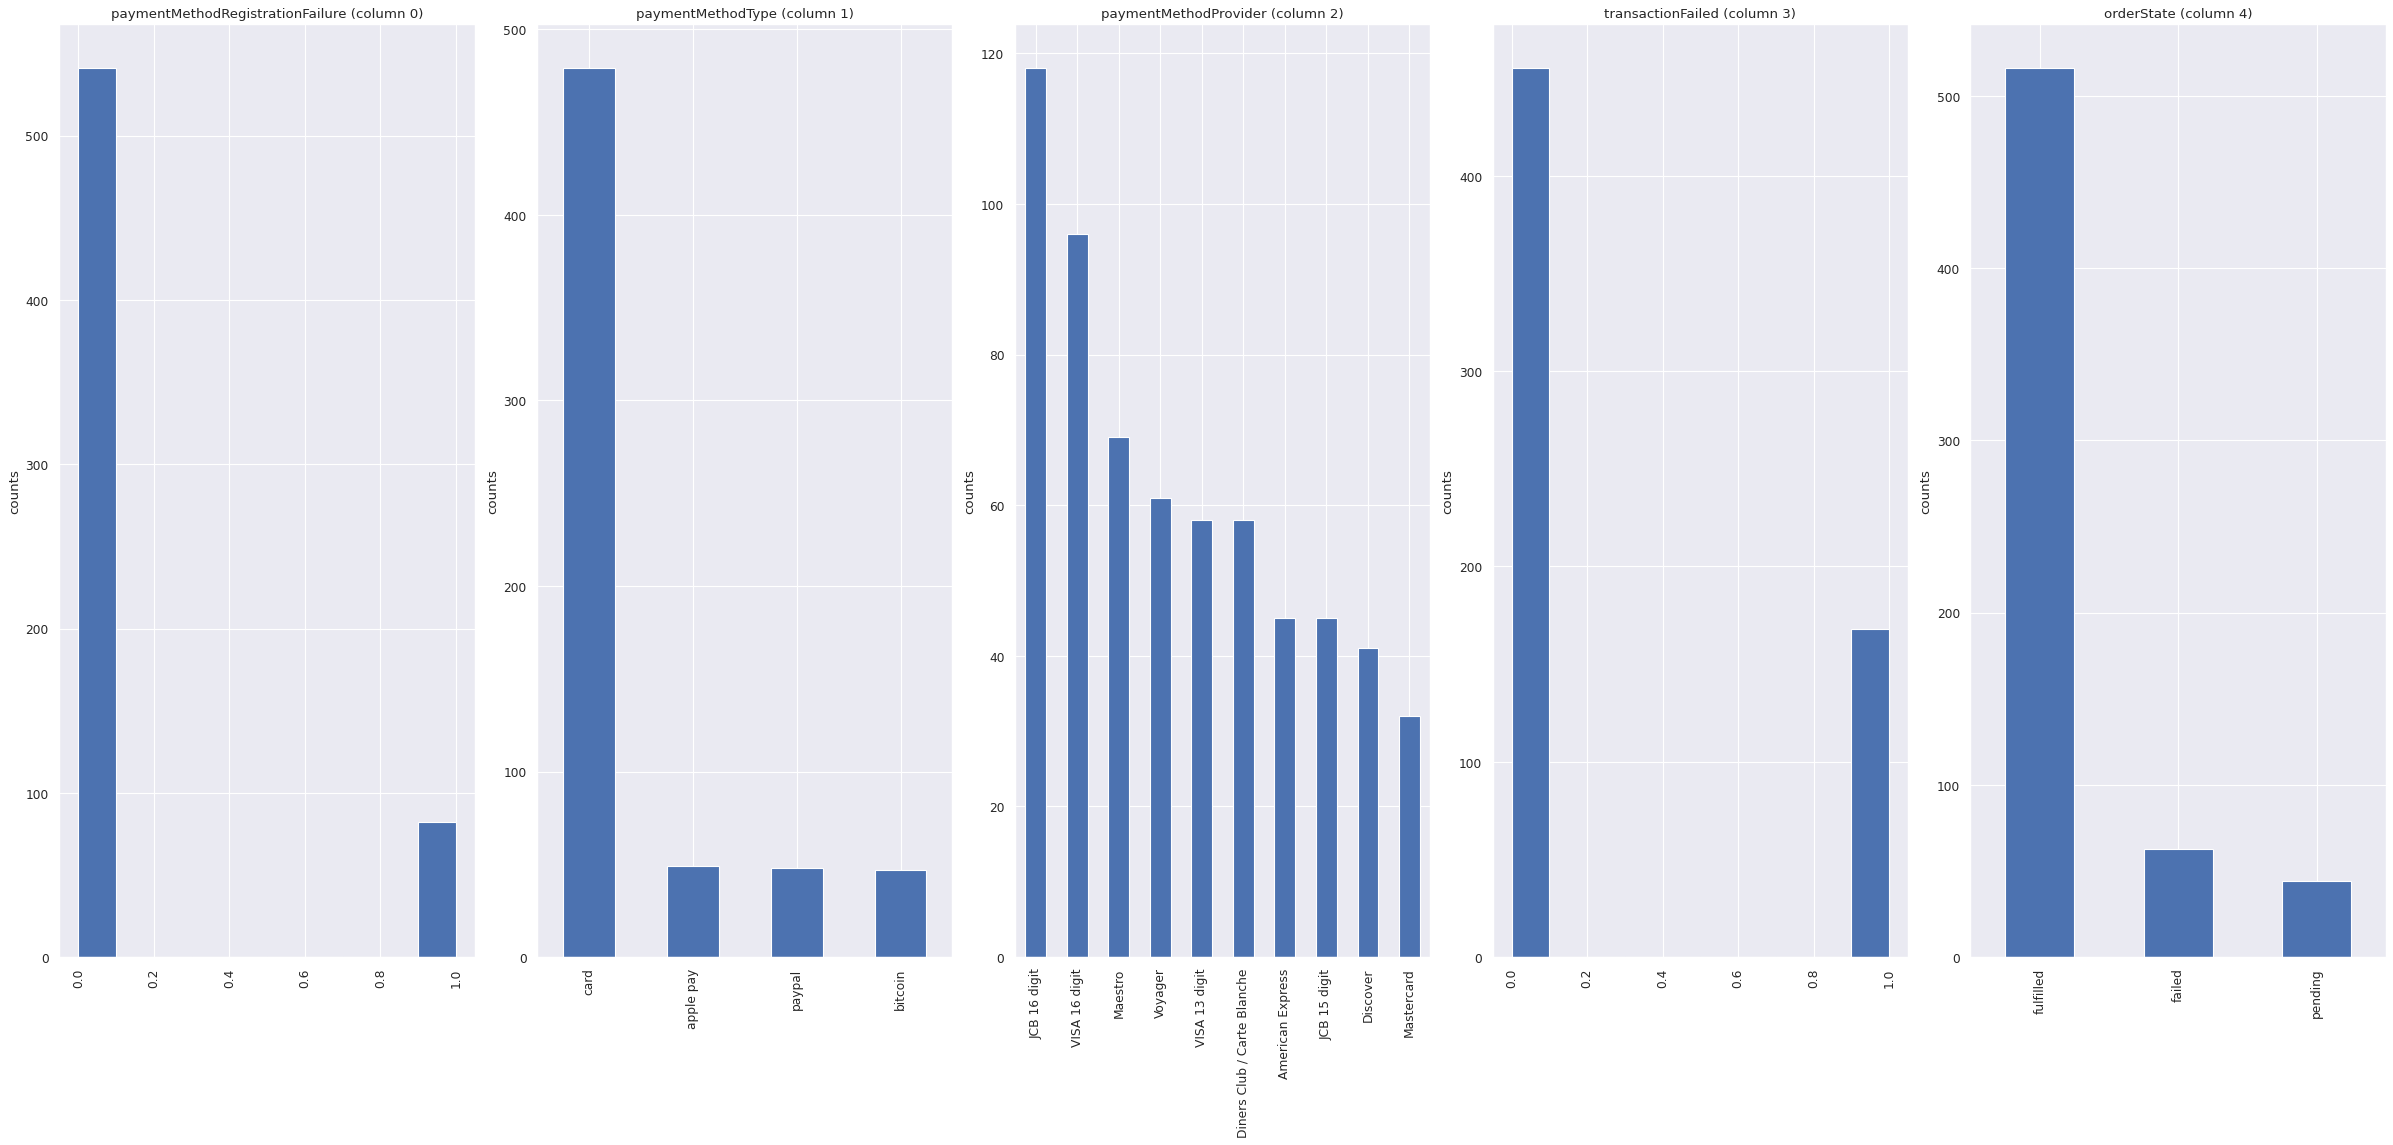

In [ ]:
plotPerColumnDistribution(ct, 10, 5)

In [ ]:
#transaction above 100 USD
ct[ct['transactionAmount'] > 100]

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
189,189,uguzman@yahoo.com,ftiso5mr,32rax6,73a2hlmnm,0,card,VISA 16 digit,353,1,fulfilled


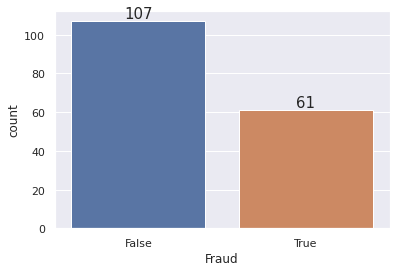

In [ ]:
#Comparasion fraud & non fraud transactions
sns.countplot(x= 'Fraud',data=c)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.4, p.get_y() + height, '%d' % height, 
            fontsize=15, ha='center', va='bottom')
plt.show()

In [ ]:
#how many emails
c['customerEmail'].nunique()

161

In [ ]:
#how many emails
ct['customerEmail'].nunique()

136

In [ ]:
#See the difference emails
c['customerEmail'].nunique() , ct['customerEmail'].nunique()

(161, 136)

In [ ]:
#Finding out the emails that are repeated in the dataset.
mail_list=[]
repeat =0
result={}
for i in range(0,168):
    repeat = 0
    for j in range(0,168):
        if c['customerEmail'][i] == c['customerEmail'][j]:
            repeat+=1
    result.update({c['customerEmail'][i]:repeat})
result    

{'josephhoward@yahoo.com': 1,
 'evansjeffery@yahoo.com': 1,
 'andersonwilliam@yahoo.com': 1,
 'rubenjuarez@yahoo.com': 1,
 'uchen@malone.com': 1,
 'robinsoncynthia@dunn.com': 1,
 'samuel15@saunders-rhodes.com': 1,
 'johnlowery@gmail.com': 8,
 'jameslandry@rodriguez.com': 1,
 'ubranch@rivera-parker.info': 1,
 'bowenwilliam@yahoo.com': 1,
 'ksummers@hotmail.com': 1,
 'christineklein@wright-boyd.org': 1,
 'meganwalters@chavez.com': 1,
 'caleb94@sutton.info': 1,
 'gonzalesjackson@gmail.com': 1,
 'dana09@yahoo.com': 1,
 'alec27@bell.com': 1,
 'juliecook@hotmail.com': 1,
 'meganberry@clark.biz': 1,
 'psantiago@nelson.net': 1,
 'harrisnicholas@mitchell-hancock.com': 1,
 'davismike@hotmail.com': 1,
 'guerramichael@hotmail.com': 1,
 'natalie98@yahoo.com': 1,
 'karen54@mullins.biz': 1,
 'avaldez@gmail.com': 1,
 'blackjoel@wright.com': 1,
 'abigail08@yahoo.com': 1,
 'catherine64@gmail.com': 1,
 'romerolauren@hotmail.com': 1,
 'qramsey@hotmail.com': 1,
 '9es7t@u6n7x': 1,
 'ypruitt@hotmail.com': 1,

'johnlowery@gmail.com' repeated 8 times in the dataset.

In [ ]:
c[c['customerEmail']=='johnlowery@gmail.com']

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True
40,40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True
45,45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True
65,65,johnlowery@gmail.com,04712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,True
79,79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True
133,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True
155,155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,True
165,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True


All transactions from this email address are fraudulent.

4 unique payment methods and most of the payments are made from card.

In [ ]:
#how are customers paying
ct['paymentMethodType'].unique()

array(['card', 'bitcoin', 'apple pay', 'paypal'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


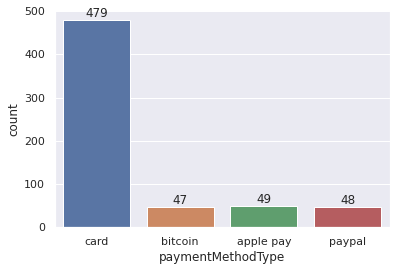

In [ ]:
sns.countplot(ct['paymentMethodType'],data = ct)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')
plt.show()

In [ ]:
ct.columns

Index(['Unnamed: 0', 'customerEmail', 'transactionId', 'orderId',
       'paymentMethodId', 'paymentMethodRegistrationFailure',
       'paymentMethodType', 'paymentMethodProvider', 'transactionAmount',
       'transactionFailed', 'orderState'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


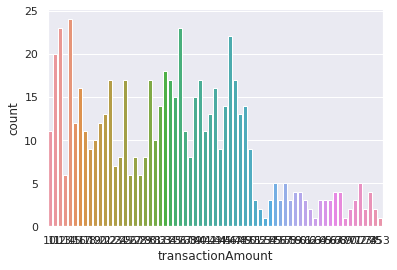

In [ ]:
sns.countplot(ct['transactionAmount'],data = ct)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


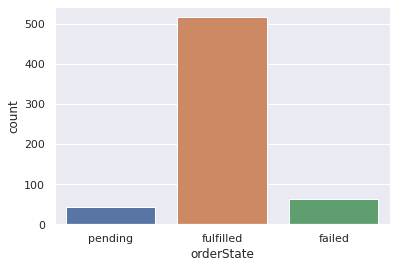

In [ ]:
#status of orders
sns.countplot(ct['orderState'])

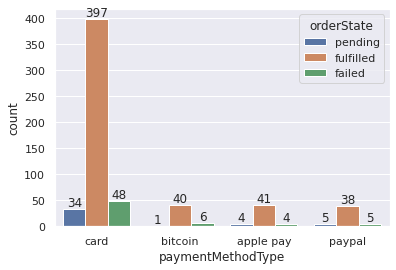

In [ ]:
sns.countplot(x='paymentMethodType',hue='orderState',data = ct)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


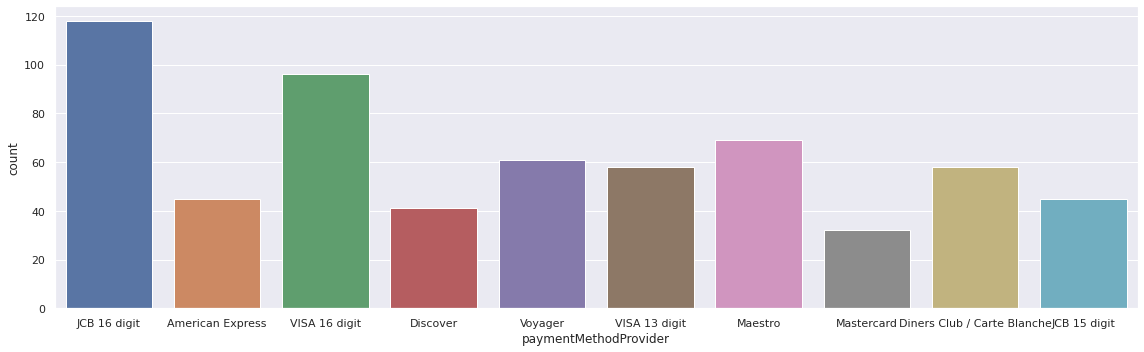

In [ ]:
#payment providers
plt.figure(figsize=(16,5))
sns.countplot(ct['paymentMethodProvider'])
plt.tight_layout()

 'JCB 16 digit' and 'VISA 16 digit' 

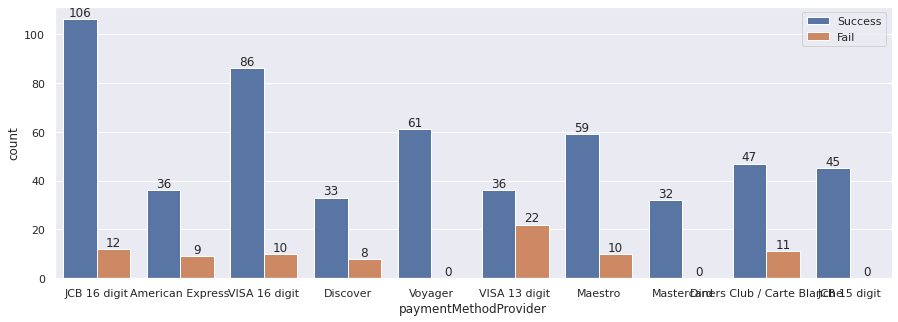

In [ ]:
#which payment providers the most 'failure' ???
plt.figure(figsize=(15,5))
sns.countplot(x='paymentMethodProvider',hue = 'paymentMethodRegistrationFailure',data=ct)
plt.legend (['Success','Fail'])
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.2, p.get_y() + height, '%d' % height, 
            fontsize=12, ha='center', va='bottom')
## tambahkan prameter angka
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


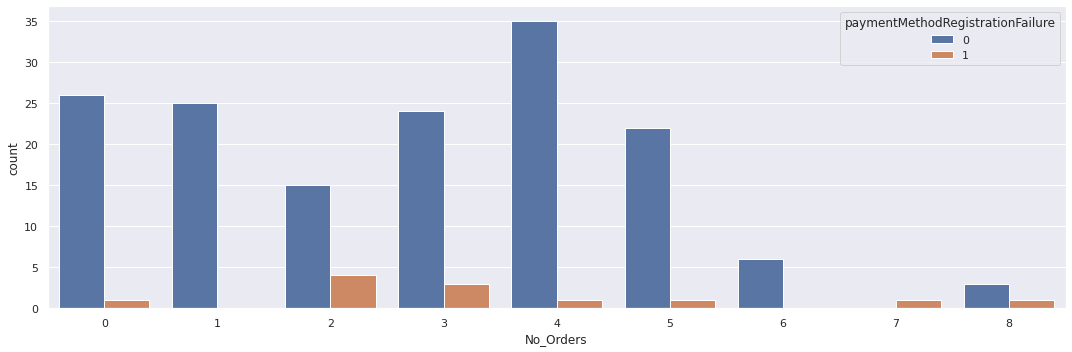

In [ ]:
#provider insights
plt.figure(figsize=(15,5))
sns.countplot(c['No_Orders'],hue = ct['paymentMethodRegistrationFailure'])
plt.tight_layout()

'JCB 16 digit'and 'VISA 13 digit' had most registration failures

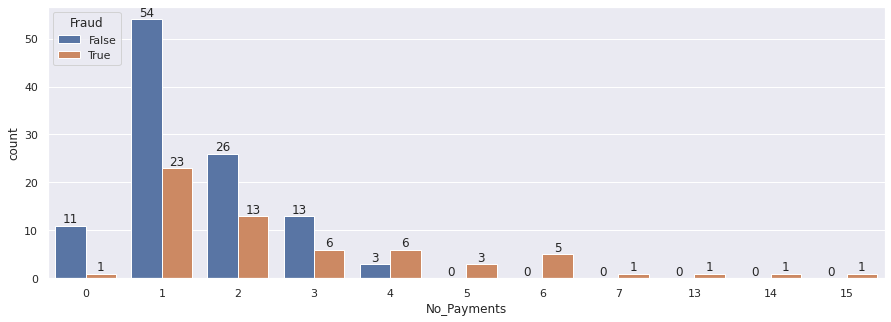

In [ ]:
#Total number of payments per Fraud Transactions
plt.figure(figsize=(15,5))
sns.countplot(x = 'No_Payments',hue = 'Fraud',data=c)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.2, p.get_y() + height, '%d' % height, 
            fontsize=12, ha='center', va='bottom')
## tambahkan prameter angka
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


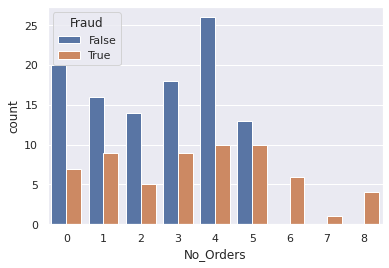

In [ ]:
sns.countplot(c['No_Orders'],hue = c['Fraud'])

From this we can see that if the no. of payments is greaten than 5 then the customer is definitely a fraud.


# **Fraud Analysis**

In [ ]:
#emails that are not common in the 2 datasets
l = []
for i in range(0,168):
    uncommon=0
    for j in range(0,623):
        if c['customerEmail'][i]==ct['customerEmail'][j]:
            uncommon+=1
    if uncommon==0:
        l.append(c['customerEmail'][i])
print(len(l))
l

25


['ubranch@rivera-parker.info',
 'guerramichael@hotmail.com',
 'zbennett@frazier.com',
 'xwang@white.com',
 'smithtiffany@davis-perkins.com',
 'knichols@gmail.com',
 'gsimpson@cox.org',
 'johnsonjennifer@yahoo.com',
 'whodges@yahoo.com',
 'zthomas@gmail.com',
 'dana23@lawrence.net',
 'brockmatthew@hotmail.com',
 'kevinreyes@johnston.net',
 'michael57@oconnor.com',
 'grace99@wright.com',
 'ukline@spears.biz',
 '3fooiar@6eph',
 'shawseth@stout-novak.com',
 'kellyfrank@atkinson.com',
 'wbeltran@ramirez-shaffer.com',
 'xramos@hardy.net',
 'stephanie21@reyes-spencer.biz',
 'bhorne@fuller-nelson.com',
 'davidwalker@hotmail.com',
 'philipnelson@dean.com']

25 emails that are not common in both the datasets so we do not have the transaction details of these customers.



In [ ]:
#joint details
joint =0
for i in c['customerEmail']:
    for email in ct['customerEmail']:
        if i==email:
            joint+=1
            break
joint

143

In [ ]:
#joint dataset This dataset has common emails from both the datasets.
final = c[c['customerEmail'].isin(ct['customerEmail'])== True]
final.shape

(143, 10)

In [ ]:
final.drop('Unnamed: 0',axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
final.reset_index(inplace = True)

In [ ]:
#adding Total Transaction amount column.
Total_transaction_amt = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==ct['customerEmail'][j]):
            s += ct['transactionAmount'][j]
    Total_transaction_amt.append(s) 

In [ ]:
final['Total_transaction_amt'] = Total_transaction_amt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Now adding No. of Transactions Failed Columns.
No_transactionsFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==ct['customerEmail'][j]):
            s += ct['transactionFailed'][j]
    No_transactionsFail.append(s)  

In [ ]:
final['No_transactionsFail'] = No_transactionsFail

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Now adding Payment Method Registration Failures column.
PaymentRegFail = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==ct['customerEmail'][j]):
            s += ct['paymentMethodRegistrationFailure'][j]
    PaymentRegFail.append(s)  

In [ ]:
final['PaymentRegFail'] = PaymentRegFail

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Now adding No. of payments from Paypal, Apple Pay, Card, Bitcoin columns.
def col_make(column_name,category):
    array = []
    for i in range(0,143):
        s=0
        for j in range(0,623):
            if(final['customerEmail'][i]==ct['customerEmail'][j]):
                if ct[column_name][j]==category:
                    s+=1
        array.append(s)
    return array 

In [ ]:
PaypalPayments = col_make('paymentMethodType','paypal')
ApplePayments = col_make('paymentMethodType','apple pay')
BitcoinPayments = col_make('paymentMethodType','bitcoin')
CardPayments = col_make('paymentMethodType','card')

In [ ]:
final['PaypalPayments']= PaypalPayments
final['ApplePayments']= ApplePayments
final['CardPayments']= CardPayments
final['BitcoinPayments']= BitcoinPayments

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#Now adding Order Fullfilled, Pending, Failed columns.
OrdersFulfilled = col_make('orderState','fulfilled')
OrdersFailed =  col_make('orderState','failed')
OrdersPending = col_make('orderState','pending')

In [ ]:
final['OrdersFulfilled'] = OrdersFulfilled
final['OrdersPending'] = OrdersPending
final['OrdersFailed'] = OrdersFailed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
JCB_16 = col_make('paymentMethodProvider','JCB 16 digit')
AmericanExp = col_make('paymentMethodProvider','American Express')
VISA_16 =  col_make('paymentMethodProvider','VISA 16 digit')
Discover =  col_make('paymentMethodProvider','Discover')
Voyager = col_make('paymentMethodProvider','Voyager')
VISA_13 = col_make('paymentMethodProvider','VISA 13 digit')
Maestro = col_make('paymentMethodProvider','Maestro')
Mastercard = col_make('paymentMethodProvider','Mastercard')
DC_CB =col_make('paymentMethodProvider','Diners Club / Carte Blanche')
JCB_15= col_make('paymentMethodProvider','JCB 15 digit')

In [ ]:
final['JCB_16'] = JCB_16
final['AmericanExp'] = AmericanExp 
final['VISA_16'] = VISA_16 
final['Discover'] = Discover
final['Voyager'] = Voyager 
final['VISA_13'] = VISA_13
final['Maestro'] = Maestro 
final['Mastercard'] = Mastercard
final['DC_CB'] = DC_CB 
final['JCB_15'] = JCB_15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
#new shape of data
final.shape

(143, 30)

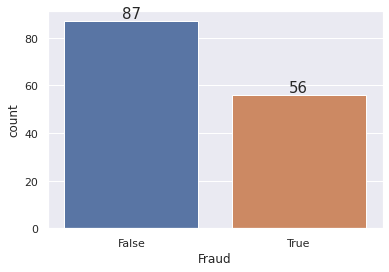

In [ ]:
sns.countplot(x= 'Fraud',data=final)
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    height = np.nan_to_num(p.get_height(), 0)
    ax.text(p.get_x()+0.4, p.get_y() + height, '%d' % height, 
            fontsize=15, ha='center', va='bottom')
plt.show()

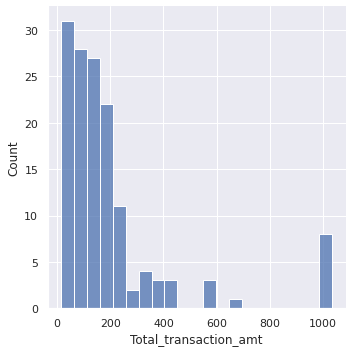

In [ ]:
#Distribution of Transaction Amount
sns.displot(final['Total_transaction_amt'])

In [ ]:
final[final['Total_transaction_amt'] > 600]

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction_amt,No_transactionsFail,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0
36,40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0
38,45,johnlowery@gmail.com,+16(4)9016414340,cdx178qymd6vy77nm4x3,222.79.159.140,"77711 Pamela Ridge\nNew Kayla, IL 27182",3,2,1,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0
55,65,johnlowery@gmail.com,04712252182,311kdz4c1210iixltk2j,42b3:df19:86fe:abd9:dafe:f6c1:eb76:c72,"11704 Andrew Villages Apt. 035\nJamesfurt, OR ...",7,5,1,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0
66,79,johnlowery@gmail.com,1-820-539-4726x993,2in0fh7lep289n8dcbdz,163.128.139.42,"814 Wagner Union\nAshleymouth, HI 35617",2,2,1,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0
70,84,lleonard@turner-fleming.com,1-414-937-7421x73705,yfpqgg5oxsn107veaala,97.111.97.42,"96103 Riley Walks\nMichellefort, ID 98085-6066",11,8,1,True,653,3,0,0,0,11,0,7,3,1,0,0,0,0,0,0,0,0,0,11
112,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0
130,155,johnlowery@gmail.com,076-099-0630x72770,6qy6oa3nqutsyyxzc54c,f259:657f:f329:2fca:c06c:8b57:d6ac:2380,"687 Rogers Bridge Suite 780\nValdezburgh, IN 2...",6,5,3,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0
140,165,johnlowery@gmail.com,635.676.0955x524,969zz9zdj8z4gns4sx5p,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,"548 Bryant Inlet\nVeronicaside, OK 00522",4,4,2,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0


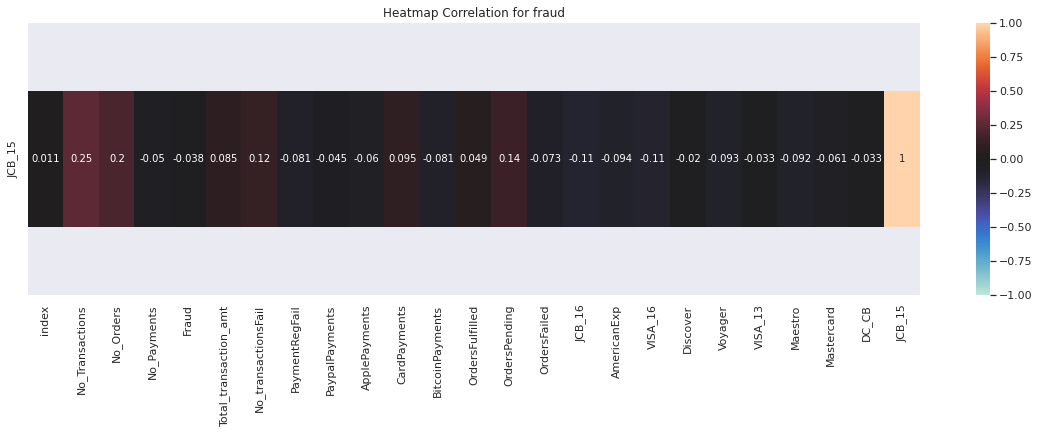

In [ ]:
corr = final.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(20, 5))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Heatmap Correlation for fraud')
plt.show()

In [ ]:
Trns_fail_order_fulfilled = []
for i in range(0,143):
    s=0
    for j in range(0,623):
        if(final['customerEmail'][i]==ct['customerEmail'][j]):
            if (ct['orderState'][j]=='fulfilled') & (ct['transactionFailed'][j]==1):
                s+=1
    Trns_fail_order_fulfilled.append(s)

In [ ]:
final['Trns_fail_order_fulfilled'] = Trns_fail_order_fulfilled

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Duplicate_IP = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerIPAddress'][i]==final['customerIPAddress'][j]):
            s+=1
    s-=1        
    Duplicate_IP.append(s)

In [ ]:
final['Duplicate_IP'] = Duplicate_IP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Fraud_Decoded = []
for i in range(0,143):
    s=0
    if(final['Fraud'][i]==True):
        s+=1        
    Fraud_Decoded.append(s)

In [ ]:
final['Fraud_Decoded'] = Fraud_Decoded

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
Duplicate_Address = []
for i in range(0,143):
    s=0
    for j in range(0,143):
        if(final['customerBillingAddress'][i]==final['customerBillingAddress'][j]):
            s+=1
    s-=1        
    Duplicate_Address.append(s)

In [ ]:
final['Duplicate_Address']=Duplicate_Address

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final[final['Fraud']==True].count()

index                        56
customerEmail                56
customerPhone                56
customerDevice               56
customerIPAddress            56
customerBillingAddress       56
No_Transactions              56
No_Orders                    56
No_Payments                  56
Fraud                        56
Total_transaction_amt        56
No_transactionsFail          56
PaymentRegFail               56
PaypalPayments               56
ApplePayments                56
CardPayments                 56
BitcoinPayments              56
OrdersFulfilled              56
OrdersPending                56
OrdersFailed                 56
JCB_16                       56
AmericanExp                  56
VISA_16                      56
Discover                     56
Voyager                      56
VISA_13                      56
Maestro                      56
Mastercard                   56
DC_CB                        56
JCB_15                       56
Trns_fail_order_fulfilled    56
Duplicat

56 data points are Truely fraudulent in the data and rest  are not fraud.

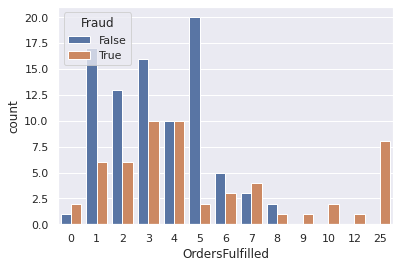

In [ ]:
sns.countplot(x = final['OrdersFulfilled'], hue = final['Fraud'])
plt.show()

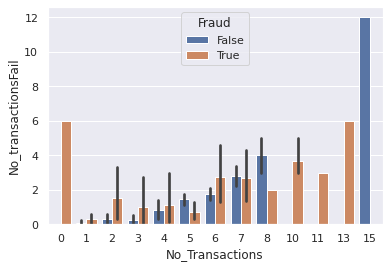

In [ ]:
sns.barplot(x = final['No_Transactions'],y = final['No_transactionsFail'],hue = final['Fraud'])

Note: When number of transactions = 0, we have number of Transactions failed =6. And hence the customer is definitely a fraud.

When No. of Transaction is 10,11,13 then the transaction is definitely a fraud irrespective of the number of transactions failed.

In [ ]:
final[(final['No_transactionsFail'] == 6) & (final['No_Transactions']==0)==True]

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction_amt,No_transactionsFail,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
36,40,johnlowery@gmail.com,737-377-9701x577,jz66ap43id2y35ivfqa5,6c21:ac1d:2089:68fa:abb7:8c00:525f:6588,"08238 Kyle Squares Suite 893\nMillermouth, IN ...",0,0,1,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0,5,0,1,0
112,133,johnlowery@gmail.com,1-143-059-1833,tyijaify2hqadwslejyr,e4c:fb48:8ee2:9819:6ae8:8d3f:3b6a:a788,"518 Wood Mews Apt. 970\nDillonstad, NE 43317-3945",0,0,0,True,1033,6,0,1,0,24,3,25,0,3,7,3,10,0,3,0,5,0,0,0,5,0,1,0


It is the same Email Address that has been repeated 8 times in the data.

In [ ]:
print(final['customerPhone'].nunique())
print(final['customerDevice'].nunique())
print(final['customerIPAddress'].nunique())
print(final['customerBillingAddress'].nunique())

143
143
140
141


In [ ]:
final[final['Duplicate_IP']>0]

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction_amt,No_transactionsFail,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
39,46,jamescampbell@randall-pacheco.biz,599-142-6783,eaul63h9guyvwuymfn3z,45.203.99.249,"29408 Lisa Lock\nPort Jennifer, LA 26501-7040",7,3,2,True,146,4,0,0,0,7,0,7,0,0,0,0,0,5,0,2,0,0,0,0,4,3,1,0
67,80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True,117,0,2,0,1,3,0,4,0,0,0,2,0,0,1,1,0,0,0,0,0,3,1,2
73,88,shelby24@hotmail.com,(071)934-3315x27613,obb41ux0zfa2td5ajo9s,45.203.99.249,"3271 Cynthia Groves\nPort Jeremyberg, CO 27305",5,4,2,True,192,1,3,0,0,5,0,3,0,2,0,0,0,0,0,0,0,2,3,0,0,3,1,0
118,141,christinemills@mcgee.com,(651)355-4709,zbn9it3s7yl69bjtrnqf,45.203.99.249,"5156 Greene Park Apt. 748\nNew Sandra, CA 1480...",5,5,2,True,125,0,0,2,0,3,0,4,0,1,0,0,0,0,5,0,0,0,0,0,0,3,1,0


From this we can see that these 4 customers have the same IP address and as it is not possible for different devices to have the same IP therefore these are definitely fraud.

In [ ]:
final[final['Duplicate_Address']>0]

,index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud,Total_transaction_amt,No_transactionsFail,PaymentRegFail,PaypalPayments,ApplePayments,CardPayments,BitcoinPayments,OrdersFulfilled,OrdersPending,OrdersFailed,JCB_16,AmericanExp,VISA_16,Discover,Voyager,VISA_13,Maestro,Mastercard,DC_CB,JCB_15,Trns_fail_order_fulfilled,Duplicate_IP,Fraud_Decoded,Duplicate_Address
47,57,feliciabrown@gmail.com,(226)129-2677,z7xkuohhjbtiqs6q9rk9,115.137.171.103,49680 Brian Squares Apt. 122\nPort Walterburgh...,1,1,1,True,41,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
67,80,warrenedward@arnold.com,201.737.5119x64000,6py7ewqjkxjw8zjl9eri,45.203.99.249,49680 Brian Squares Apt. 122\nPort Walterburgh...,4,4,14,True,117,0,2,0,1,3,0,4,0,0,0,2,0,0,1,1,0,0,0,0,0,3,1,2
75,90,brittanydean@hotmail.com,06238721842,yq8xiivmx4prlgx0gofo,3517:8e52:885:8640:a59:f5fd:cb33:b06a,49680 Brian Squares Apt. 122\nPort Walterburgh...,6,4,1,True,202,2,0,0,0,6,0,6,0,0,0,0,0,0,6,0,0,0,0,0,2,0,1,2


These 3 customers have the same Billing Address and hence these 3 are Fraud.

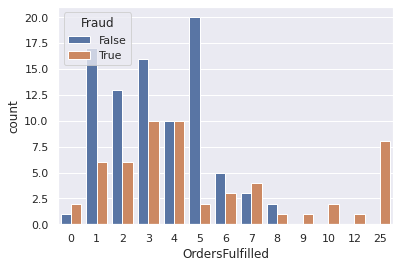

In [ ]:
sns.countplot(x = final['OrdersFulfilled'], hue = final['Fraud'])

From this we can see that if Number of Orders Fulfilled is greater than 8 then the transaction is definitely fraudulent.

# **Modeling**

In [ ]:
#Preparing data to feed into model.
X = final[['No_Transactions',
       'No_Orders', 'No_Payments', 'Total_transaction_amt',
       'No_transactionsFail', 'PaymentRegFail', 'PaypalPayments',
       'ApplePayments', 'CardPayments', 'BitcoinPayments', 'OrdersFulfilled',
       'OrdersPending', 'OrdersFailed','Trns_fail_order_fulfilled','Duplicate_IP','Duplicate_Address','JCB_16', 'AmericanExp', 'VISA_16',
       'Discover', 'Voyager', 'VISA_13', 'Maestro', 'Mastercard', 'DC_CB',
       'JCB_15']]
y = final['Fraud_Decoded']

In [ ]:
#Splitting the data into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#knn
test_error_rate=[]
for k in range(1,30):
    knn_midel=KNeighborsClassifier(n_neighbors=k)
    knn_midel.fit(X_train,y_train)
    y_p_test=knn_midel.predict(X_test)
    test_error=1-accuracy_score(y_test,y_p_test)
    test_error_rate.append(test_error)

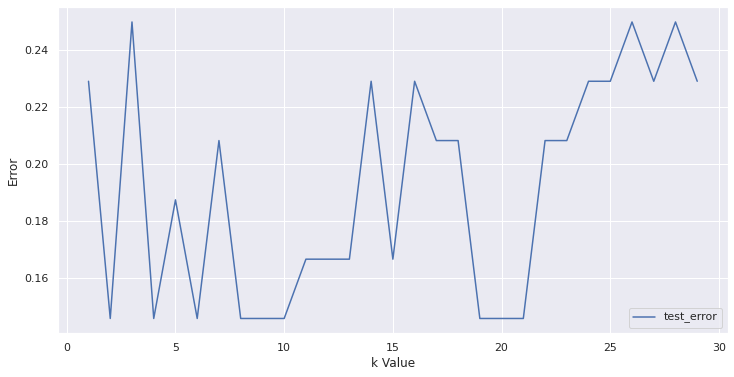

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),test_error_rate,label='test_error')
plt.legend()
plt.xlabel('k Value')
plt.ylabel('Error')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 6)
knn_model = knn_model.fit(X_train,y_train)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.56      0.72        16

    accuracy                           0.85        48
   macro avg       0.91      0.78      0.81        48
weighted avg       0.88      0.85      0.84        48



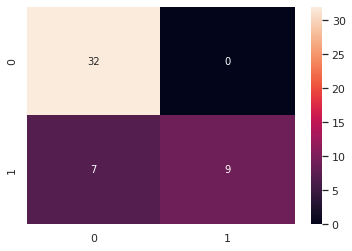

In [ ]:
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True)

0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.79      0.69      0.73        16

    accuracy                           0.83        48
   macro avg       0.82      0.80      0.81        48
weighted avg       0.83      0.83      0.83        48



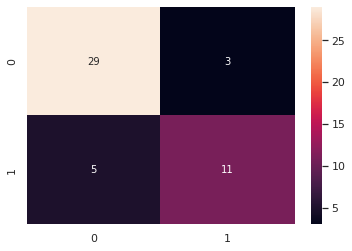

In [ ]:
#randomforest
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(data = confusion_matrix(y_test,pred),annot = True)
print(classification_report(y_test,pred))

In [ ]:
pred

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7291666666666666
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.58      0.69      0.63        16

    accuracy                           0.73        48
   macro avg       0.70      0.72      0.71        48
weighted avg       0.74      0.73      0.73        48



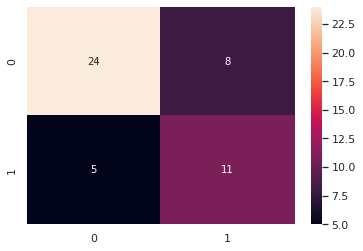

In [ ]:
#Logistic Regression Model.
logr = LogisticRegression()
logr.fit(X_train,y_train)
log_pred =logr.predict(X_test)
print(accuracy_score(y_test,log_pred))
sns.heatmap(data=confusion_matrix(y_test,log_pred),annot = True)
print(classification_report(y_test,log_pred))

In [ ]:
log_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

0.8333333333333334
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.79      0.69      0.73        16

    accuracy                           0.83        48
   macro avg       0.82      0.80      0.81        48
weighted avg       0.83      0.83      0.83        48



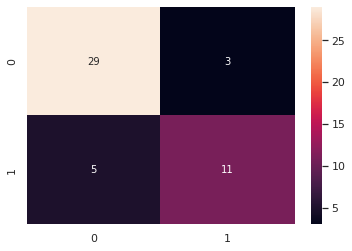

In [ ]:
#Support Vector Machines Ckassifier.
from sklearn.svm import SVC
svc = SVC(gamma = 'auto')
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)
print(accuracy_score(y_test,pred))
sns.heatmap(data = confusion_matrix(y_test,pred),annot = True)
print(classification_report(y_test,pred))

Logistic Regression Model is giving the best outcome 

*HyperParameter Tuning: #Using Grid Search Cross Validation to fine tune the models to improve accuracy.
*

In [ ]:
#Applying Grid Search CV on Support Vector Classifier.
svc_param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [ ]:
svc_param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [ ]:
gridsvc = GridSearchCV(SVC(),svc_param_grid,refit=True,verbose=3)

In [ ]:
gridsvc.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
gridsvc.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
gridsvc.best_estimator_

SVC(C=100, gamma=0.0001)

In [ ]:
grid_svc_predictions = gridsvc.predict(X_test)

In [ ]:
grid_svc_predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        32
           1       0.83      0.62      0.71        16

    accuracy                           0.83        48
   macro avg       0.83      0.78      0.80        48
weighted avg       0.83      0.83      0.83        48



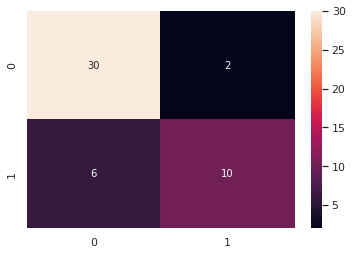

In [ ]:
print(accuracy_score(y_test,grid_svc_predictions))
sns.heatmap(data = confusion_matrix(y_test,grid_svc_predictions),annot= True)
print(classification_report(y_test,grid_svc_predictions))

In [ ]:
#Applying Grid Search CV on Logistic Regression.
logr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
grid_logr = GridSearchCV(LogisticRegression(),logr_param_grid,refit=True,verbose=3)

In [ ]:
grid_logr.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ...........................C=0.001;, score=0.632 total time=   0.0s
[CV 2/5] END ...........................C=0.001;, score=0.789 total time=   0.0s
[CV 3/5] END ...........................C=0.001;, score=0.579 total time=   0.0s
[CV 4/5] END ...........................C=0.001;, score=0.632 total time=   0.0s
[CV 5/5] END ...........................C=0.001;, score=0.842 total time=   0.0s
[CV 1/5] END ............................C=0.01;, score=0.737 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.842 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.579 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/5] END ............................C=0.01;, score=0.737 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.842 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.684 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.789 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.684 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.789 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.789 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/5] END ...............................C=1;, score=0.632 total time=   0.0s
[CV 2/5] END ...............................C=1;, score=0.684 total time=   0.0s
[CV 3/5] END ...............................C=1;, score=0.737 total time=   0.0s
[CV 4/5] END ...............................C=1;, score=0.737 total time=   0.0s
[CV 5/5] END ...............................C=1;, score=0.789 total time=   0.0s
[CV 1/5] END ..............................C=10;, score=0.684 total time=   0.0s
[CV 2/5] END ..............................C=10;, score=0.737 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/5] END ..............................C=10;, score=0.737 total time=   0.0s
[CV 4/5] END ..............................C=10;, score=0.737 total time=   0.1s
[CV 5/5] END ..............................C=10;, score=0.737 total time=   0.0s
[CV 1/5] END .............................C=100;, score=0.684 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/5] END .............................C=100;, score=0.737 total time=   0.1s
[CV 3/5] END .............................C=100;, score=0.737 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/5] END .............................C=100;, score=0.684 total time=   0.1s
[CV 5/5] END .............................C=100;, score=0.737 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/5] END ............................C=1000;, score=0.684 total time=   0.1s
[CV 2/5] END ............................C=1000;, score=0.737 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/5] END ............................C=1000;, score=0.737 total time=   0.1s
[CV 4/5] END ............................C=1000;, score=0.684 total time=   0.1s
[CV 5/5] END ............................C=1000;, score=0.737 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, verbose=3)

In [ ]:
grid_logr.best_params_

{'C': 0.1}

In [ ]:
grid_logr.best_estimator_

LogisticRegression(C=0.1)

In [ ]:
grid_logr_predictions = grid_logr.predict(X_test)

0.7291666666666666
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.59      0.62      0.61        16

    accuracy                           0.73        48
   macro avg       0.70      0.70      0.70        48
weighted avg       0.73      0.73      0.73        48



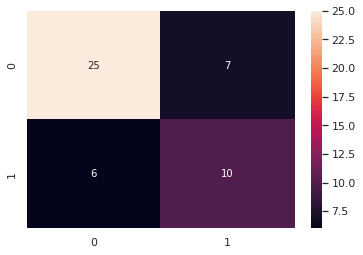

In [ ]:
print(accuracy_score(y_test,grid_logr_predictions))
sns.heatmap(data = confusion_matrix(y_test,grid_logr_predictions),annot = True)
print(classification_report(y_test,grid_logr_predictions))